In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# from config import db_password
import psycopg2
import getpass
import os

In [13]:
# engine = create_engine(DATABASE_URI)
conn = psycopg2.connect('dbname=data user=postgres host=localhost password=xxx port=5432')

In [14]:
conn

<connection object at 0x0000020828C2DAE8; dsn: 'user=postgres password=xxx dbname=data host=localhost port=5432', closed: 0>

In [15]:
cur = conn.cursor()

In [16]:
cur

<cursor object at 0x0000020828F3E208; closed: 0>

In [17]:
type(cur)

psycopg2.extensions.cursor

In [46]:
cur.execute('''SELECT * FROM public."Data" LIMIT 5''')

In [47]:
data = cur.fetchall()

In [48]:
data

[('yuma',
  'az',
  'September',
  2018,
  Decimal('63.66518706'),
  Decimal('23.96956246'),
  Decimal('0.100550275'),
  Decimal('-0.2'),
  Decimal('0.6'),
  Decimal('4.08'),
  '9/1/2018',
  9,
  248,
  915),
 ('taos',
  'nm',
  'September',
  2018,
  Decimal('10.082435'),
  Decimal('29.86683576'),
  Decimal('0.09717062'),
  Decimal('-0.218978102'),
  Decimal('0.285714286'),
  Decimal('4.08'),
  '9/1/2018',
  9,
  59,
  1343),
 ('waco',
  'tx',
  'November',
  2018,
  Decimal('61.12872543'),
  Decimal('88.8395688'),
  Decimal('-0.047619048'),
  Decimal('0.247863248'),
  Decimal('-0.208333333'),
  Decimal('4.28'),
  '11/1/2018',
  11,
  -255,
  290),
 ('pittsburgh',
  'pa',
  'November',
  2018,
  Decimal('34.43246671'),
  Decimal('63.4115409'),
  Decimal('-0.022687609'),
  Decimal('-0.08'),
  Decimal('0.181818182'),
  Decimal('4.28'),
  '11/1/2018',
  11,
  21,
  837),
 ('grand rapids',
  'mi',
  'November',
  2018,
  Decimal('83.44958782'),
  Decimal('77.61572606'),
  Decimal('-0.0095

In [21]:
data_basic = pd.DataFrame(data, columns =['city' , 'state', 'month', 'year', 'supply_score',
                                          'demand_score', 'median_listing_price_yy', 'median_days_on_market_yy',
                                          'unique_viewers_per_property_yy', 'mortgage_rate', 'date', 'date_month_num', 
                                          'hotness_rank_yy', 'hotness_rank'])

In [22]:
data_basic.head()

,city,state,month,year,supply_score,demand_score,median_listing_price_yy,median_days_on_market_yy,unique_viewers_per_property_yy,mortgage_rate,date,date_month_num,hotness_rank_yy,hotness_rank
0,yuma,az,September,2018,63.66518706,23.96956246,0.100550275,-0.2,0.6,4.08,9/1/2018,9,248,915
1,taos,nm,September,2018,10.082435,29.86683576,0.09717062,-0.218978102,0.285714286,4.08,9/1/2018,9,59,1343
2,waco,tx,November,2018,61.12872543,88.8395688,-0.047619048,0.247863248,-0.208333333,4.28,11/1/2018,11,-255,290
3,pittsburgh,pa,November,2018,34.43246671,63.4115409,-0.022687609,-0.08,0.181818182,4.28,11/1/2018,11,21,837
4,grand rapids,mi,November,2018,83.44958782,77.61572606,-0.009567198,0.00862069,0,4.28,11/1/2018,11,-91,186


In [23]:
data_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42584 entries, 0 to 42583
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   city                            42584 non-null  object
 1   state                           42584 non-null  object
 2   month                           42584 non-null  object
 3   year                            42584 non-null  int64 
 4   supply_score                    42584 non-null  object
 5   demand_score                    42584 non-null  object
 6   median_listing_price_yy         42584 non-null  object
 7   median_days_on_market_yy        42584 non-null  object
 8   unique_viewers_per_property_yy  42584 non-null  object
 9   mortgage_rate                   42584 non-null  object
 10  date                            42584 non-null  object
 11  date_month_num                  42584 non-null  int64 
 12  hotness_rank_yy                 42584 non-null

In [24]:
data_basic['supply_score'] = data_basic['supply_score'].astype(float, errors = 'raise')
data_basic['demand_score'] = data_basic['demand_score'].astype(float, errors = 'raise')
data_basic['median_listing_price_yy'] = data_basic['median_listing_price_yy'].astype(float, errors = 'raise')
data_basic['median_days_on_market_yy'] = data_basic['median_days_on_market_yy'].astype(float, errors = 'raise')
data_basic['unique_viewers_per_property_yy'] = data_basic['unique_viewers_per_property_yy'].astype(float, errors = 'raise')
data_basic['mortgage_rate'] = data_basic['mortgage_rate'].astype(float, errors = 'raise')

In [25]:
data_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42584 entries, 0 to 42583
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   city                            42584 non-null  object 
 1   state                           42584 non-null  object 
 2   month                           42584 non-null  object 
 3   year                            42584 non-null  int64  
 4   supply_score                    42584 non-null  float64
 5   demand_score                    42584 non-null  float64
 6   median_listing_price_yy         42584 non-null  float64
 7   median_days_on_market_yy        42584 non-null  float64
 8   unique_viewers_per_property_yy  42584 non-null  float64
 9   mortgage_rate                   42584 non-null  float64
 10  date                            42584 non-null  object 
 11  date_month_num                  42584 non-null  int64  
 12  hotness_rank_yy                 

Create dataframe for ML model, use supply and demand score

In [26]:
X = data_basic.iloc[:, [4, 5]].values

In [27]:
print(X)

[[63.66518706 23.96956246]
 [10.082435   29.86683576]
 [61.12872543 88.8395688 ]
 ...
 [91.05897273 12.5554851 ]
 [58.14838301 65.884591  ]
 [13.12618897 45.14901712]]


Use elbow method to find the optimal number of clusters

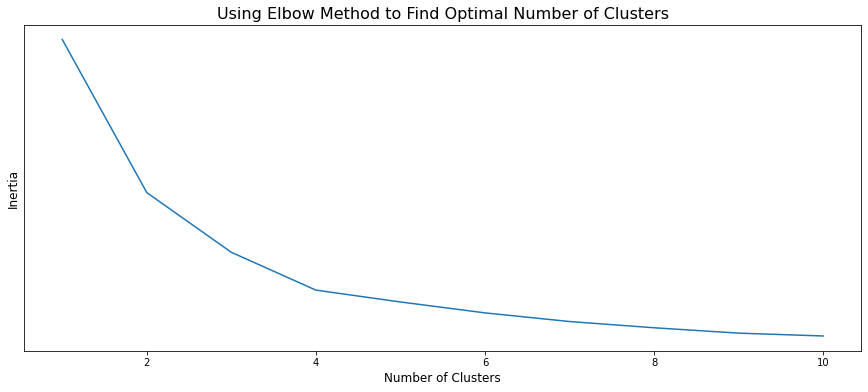

In [28]:
# Implement Elbow Method 
# Run the K-Means algo several times with a seperate number of clusters
from sklearn.cluster import KMeans

# For loop with K-Means for 10 different number of clusters (1-10)
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

#plot the graph with matplotlib
plt.figure(figsize=(15,6))

plt.plot(range(1, 11), wcss)
plt.ticklabel_format(useOffset=False, style='plain')
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.title('Using Elbow Method to Find Optimal Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.show()

Train K-Means model on the dataset

In [29]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [30]:
print(y_kmeans)

[2 1 0 ... 2 3 1]


Visualize the Clusters

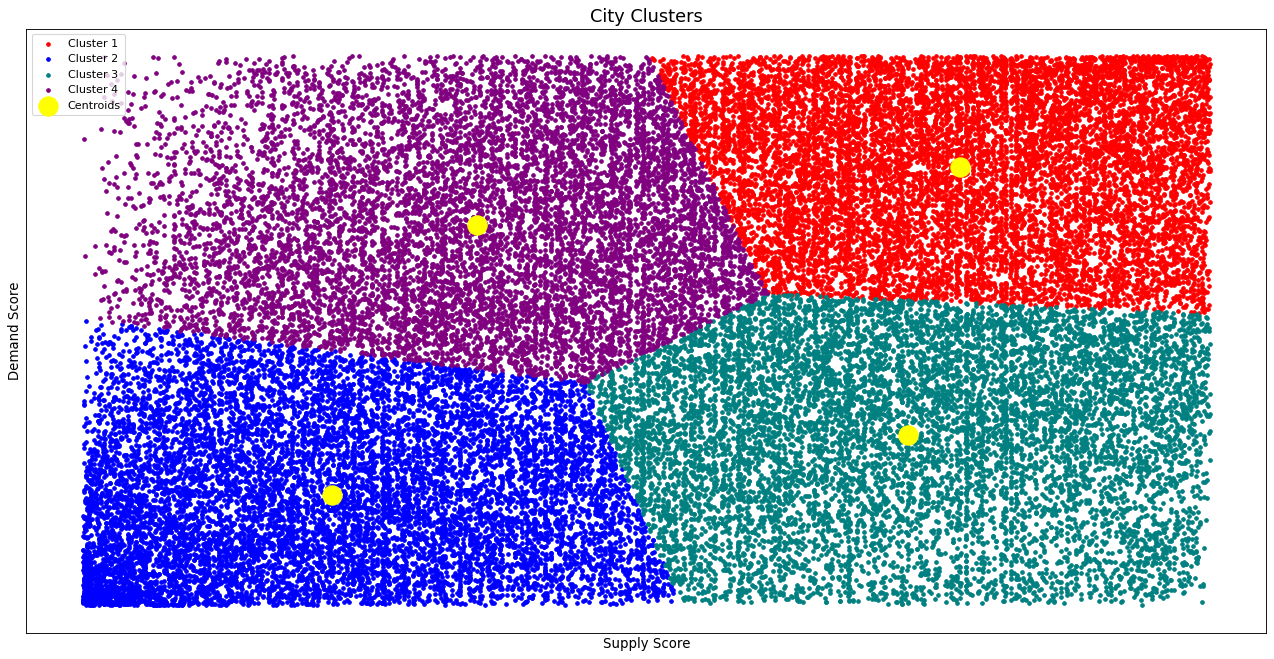

In [31]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=80)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'teal', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'purple', label = 'Cluster 4')
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)

# plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('City Clusters', fontsize=16)
plt.xlabel('Supply Score', fontsize=12)
plt.ylabel('Demand Score', fontsize=12)
plt.legend()
plt.show()

Add "class" column to dataset with new clusters

In [32]:
data_basic["class"] = kmeans.labels_

In [33]:
data_basic.head()

,city,state,month,year,supply_score,demand_score,median_listing_price_yy,median_days_on_market_yy,unique_viewers_per_property_yy,mortgage_rate,date,date_month_num,hotness_rank_yy,hotness_rank,class
0,yuma,az,September,2018,63.665187,23.969562,0.100550,-0.200000,0.600000,4.08,9/1/2018,9,248,915,2
1,taos,nm,September,2018,10.082435,29.866836,0.097171,-0.218978,0.285714,4.08,9/1/2018,9,59,1343,1
2,waco,tx,November,2018,61.128725,88.839569,-0.047619,0.247863,-0.208333,4.28,11/1/2018,11,-255,290,0
3,pittsburgh,pa,November,2018,34.432467,63.411541,-0.022688,-0.080000,0.181818,4.28,11/1/2018,11,21,837,3
4,grand rapids,mi,November,2018,83.449588,77.615726,-0.009567,0.008621,0.000000,4.28,11/1/2018,11,-91,186,0


Create copy of data_basic called dataset_clusters

In [34]:
data_clusters = data_basic.copy()

In [35]:
data_clusters.shape

(42584, 15)

In [36]:
data_clusters.keys()

Index(['city', 'state', 'month', 'year', 'supply_score', 'demand_score',
       'median_listing_price_yy', 'median_days_on_market_yy',
       'unique_viewers_per_property_yy', 'mortgage_rate', 'date',
       'date_month_num', 'hotness_rank_yy', 'hotness_rank', 'class'],
      dtype='object')

Check for null values

In [37]:
data_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42584 entries, 0 to 42583
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   city                            42584 non-null  object 
 1   state                           42584 non-null  object 
 2   month                           42584 non-null  object 
 3   year                            42584 non-null  int64  
 4   supply_score                    42584 non-null  float64
 5   demand_score                    42584 non-null  float64
 6   median_listing_price_yy         42584 non-null  float64
 7   median_days_on_market_yy        42584 non-null  float64
 8   unique_viewers_per_property_yy  42584 non-null  float64
 9   mortgage_rate                   42584 non-null  float64
 10  date                            42584 non-null  object 
 11  date_month_num                  42584 non-null  int64  
 12  hotness_rank_yy                 

Summary stats transposed

In [38]:
data_clusters.describe().T

,count,mean,std,min,25%,50%,75%,max
year,42584.0,2019.747159,0.817474,2018.000000,2019.000000,2020.000000,2020.000000,2021.000000
supply_score,42584.0,51.923517,27.837833,0.000000,28.662016,52.631579,75.776791,100.000000
demand_score,42584.0,49.993759,28.883054,0.000000,25.110970,49.968294,75.079264,100.000000
median_listing_price_yy,42584.0,0.074040,0.140423,-0.846743,0.000000,0.058285,0.131194,6.291667
median_days_on_market_yy,42584.0,-0.039834,0.575306,-0.905660,-0.226212,-0.075606,0.061538,25.103448
unique_viewers_per_property_yy,42584.0,0.730865,0.777093,-0.772727,0.181818,0.470588,1.153846,18.250000
mortgage_rate,42584.0,2.893544,0.563879,2.180000,2.360000,2.885000,3.200000,4.280000
date_month_num,42584.0,6.198619,3.486933,1.000000,3.000000,6.000000,9.000000,12.000000
hotness_rank_yy,42584.0,-12.062911,254.609427,-1482.000000,-144.000000,-8.000000,121.000000,1233.000000
hotness_rank,42584.0,764.173398,445.342077,1.000000,380.000000,753.000000,1141.000000,1574.000000


In [39]:
data_clusters.dtypes

city                               object
state                              object
month                              object
year                                int64
supply_score                      float64
demand_score                      float64
median_listing_price_yy           float64
median_days_on_market_yy          float64
unique_viewers_per_property_yy    float64
mortgage_rate                     float64
date                               object
date_month_num                      int64
hotness_rank_yy                     int64
hotness_rank                        int64
class                               int32
dtype: object

In [40]:
# remove "year" column
data_corr = data_clusters.drop(columns=["year"])
data_corr.head()

,city,state,month,supply_score,demand_score,median_listing_price_yy,median_days_on_market_yy,unique_viewers_per_property_yy,mortgage_rate,date,date_month_num,hotness_rank_yy,hotness_rank,class
0,yuma,az,September,63.665187,23.969562,0.100550,-0.200000,0.600000,4.08,9/1/2018,9,248,915,2
1,taos,nm,September,10.082435,29.866836,0.097171,-0.218978,0.285714,4.08,9/1/2018,9,59,1343,1
2,waco,tx,November,61.128725,88.839569,-0.047619,0.247863,-0.208333,4.28,11/1/2018,11,-255,290,0
3,pittsburgh,pa,November,34.432467,63.411541,-0.022688,-0.080000,0.181818,4.28,11/1/2018,11,21,837,3
4,grand rapids,mi,November,83.449588,77.615726,-0.009567,0.008621,0.000000,4.28,11/1/2018,11,-91,186,0


Text(0.5, 1.0, 'Correlation Matrix')

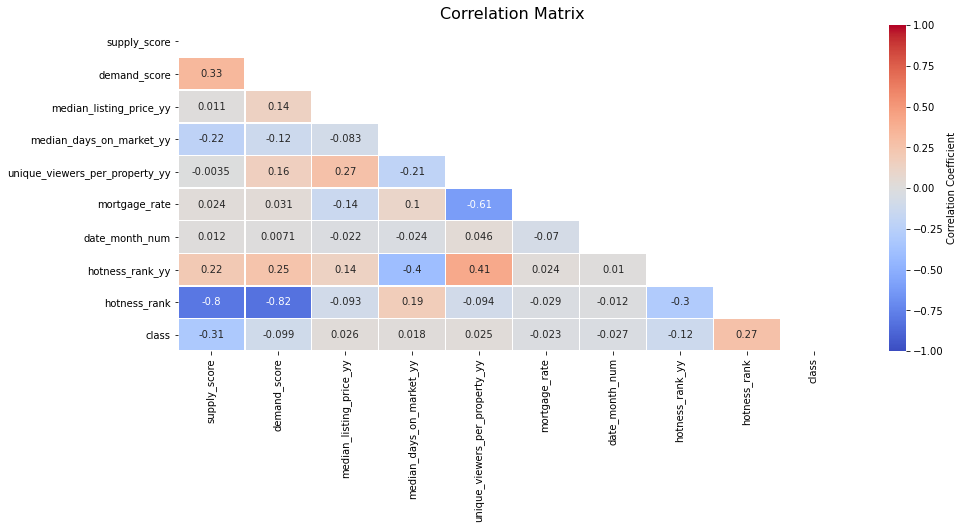

In [41]:
plt.figure(figsize=(15,6))

matrix = np.triu(data_corr.corr())
sns.heatmap(data_corr.corr(), annot=True, mask=matrix, cmap= 'coolwarm', vmin=-1, vmax=1, linewidths=.5, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix', fontsize=16)

[Text(0.5, 0, 'supply_score'),
 Text(1.5, 0, 'demand_score'),
 Text(2.5, 0, 'median_listing_price_yy'),
 Text(3.5, 0, 'median_days_on_market_yy'),
 Text(4.5, 0, 'unique_viewers_per_property_yy'),
 Text(5.5, 0, 'mortgage_rate'),
 Text(6.5, 0, 'date_month_num'),
 Text(7.5, 0, 'hotness_rank_yy'),
 Text(8.5, 0, 'hotness_rank'),
 Text(9.5, 0, 'class')]

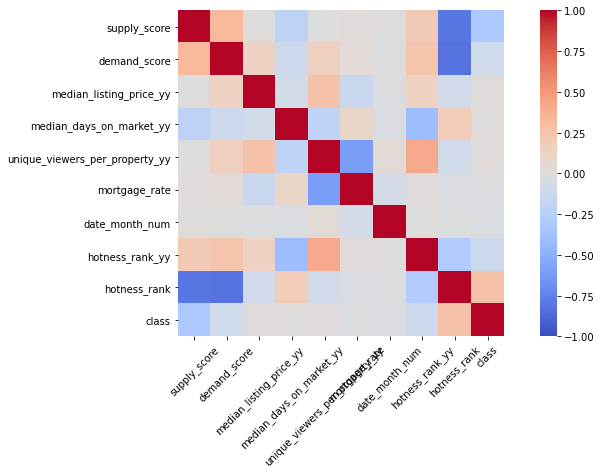

In [42]:
plt.figure(figsize=(13,6))

corr = data_corr.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45
)

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'supply_score'}>,
        <AxesSubplot:title={'center':'demand_score'}>],
       [<AxesSubplot:title={'center':'median_listing_price_yy'}>,
        <AxesSubplot:title={'center':'median_days_on_market_yy'}>,
        <AxesSubplot:title={'center':'unique_viewers_per_property_yy'}>],
       [<AxesSubplot:title={'center':'mortgage_rate'}>,
        <AxesSubplot:title={'center':'date_month_num'}>,
        <AxesSubplot:title={'center':'hotness_rank_yy'}>],
       [<AxesSubplot:title={'center':'hotness_rank'}>,
        <AxesSubplot:title={'center':'class'}>, <AxesSubplot:>]],
      dtype=object)

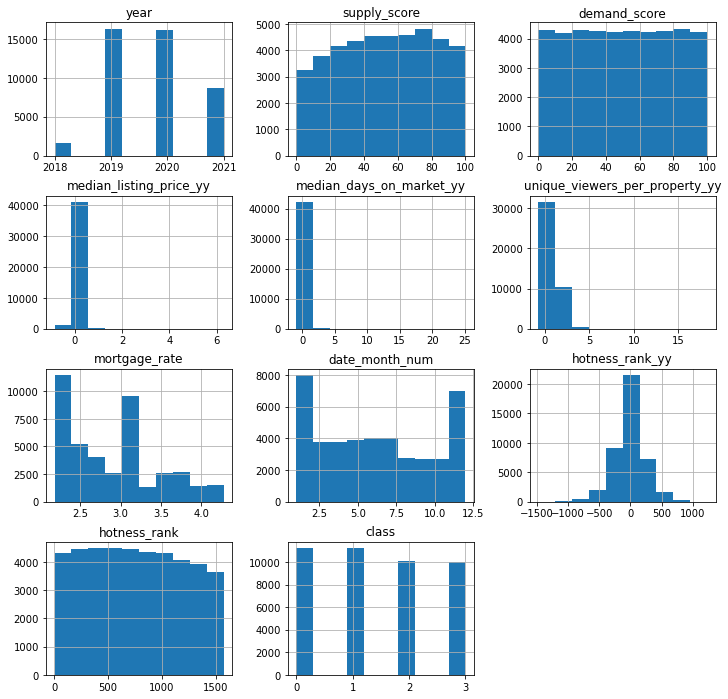

In [43]:
data_clusters.hist(figsize=(12,12))

Identify the Outliers

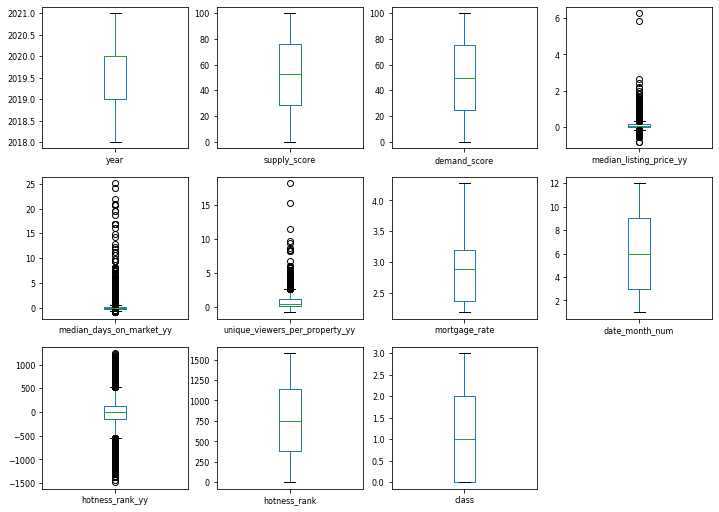

In [44]:
data_clusters.plot(kind='box', subplots=True, layout= (4,4), fontsize=8, figsize=(12,12));

C:\Users\pozzu\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hotness_rank', ylabel='Density'>

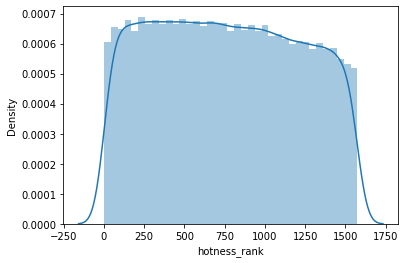

In [45]:
sns.distplot(data_clusters['hotness_rank'])

Supervised Machine Learning - Simple Linear Regression

In [49]:
data_clusters.head()

,city,state,month,year,supply_score,demand_score,median_listing_price_yy,median_days_on_market_yy,unique_viewers_per_property_yy,mortgage_rate,date,date_month_num,hotness_rank_yy,hotness_rank,class
0,yuma,az,September,2018,63.665187,23.969562,0.100550,-0.200000,0.600000,4.08,9/1/2018,9,248,915,2
1,taos,nm,September,2018,10.082435,29.866836,0.097171,-0.218978,0.285714,4.08,9/1/2018,9,59,1343,1
2,waco,tx,November,2018,61.128725,88.839569,-0.047619,0.247863,-0.208333,4.28,11/1/2018,11,-255,290,0
3,pittsburgh,pa,November,2018,34.432467,63.411541,-0.022688,-0.080000,0.181818,4.28,11/1/2018,11,21,837,3
4,grand rapids,mi,November,2018,83.449588,77.615726,-0.009567,0.008621,0.000000,4.28,11/1/2018,11,-91,186,0


In [50]:
data_clusters.shape

(42584, 15)

In [51]:
X = data_clusters.iloc[:, [5]].values # independent variable matrix (demand_score)
y = data_clusters.iloc[:,[13]].values # dependent variable vector (hotness_rank)

Splitting the data clusters into the training set and test set

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [53]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [59]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6739269454740837
Testing Score: 0.6771369192904538


Predict the test set results

In [60]:
y_pred = regressor.predict(X_test)
print(y_pred.shape)

(8517, 1)


Visualizing the Training set results

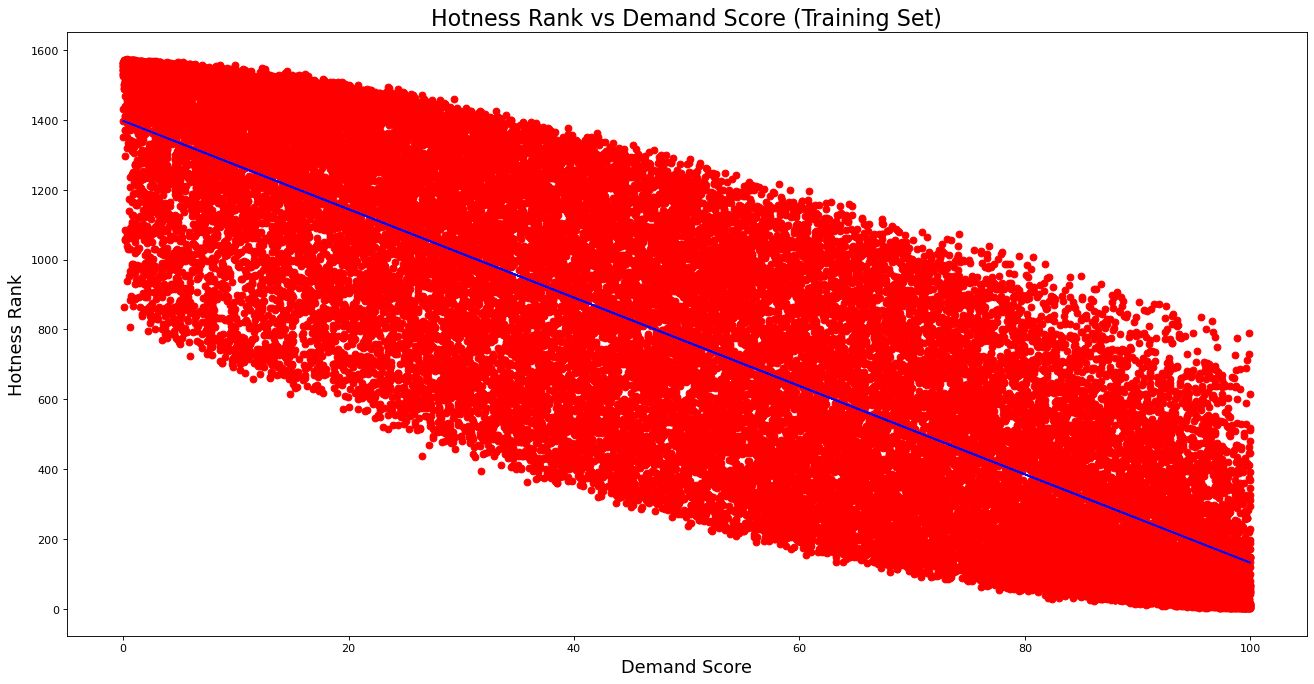

In [56]:
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=80)

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color= 'blue')

plt.title('Hotness Rank vs Demand Score (Training Set)', fontsize=20)
plt.xlabel('Demand Score', fontsize=16)
plt.ylabel('Hotness Rank', fontsize=16)
plt.show()

Visualizing the test set results

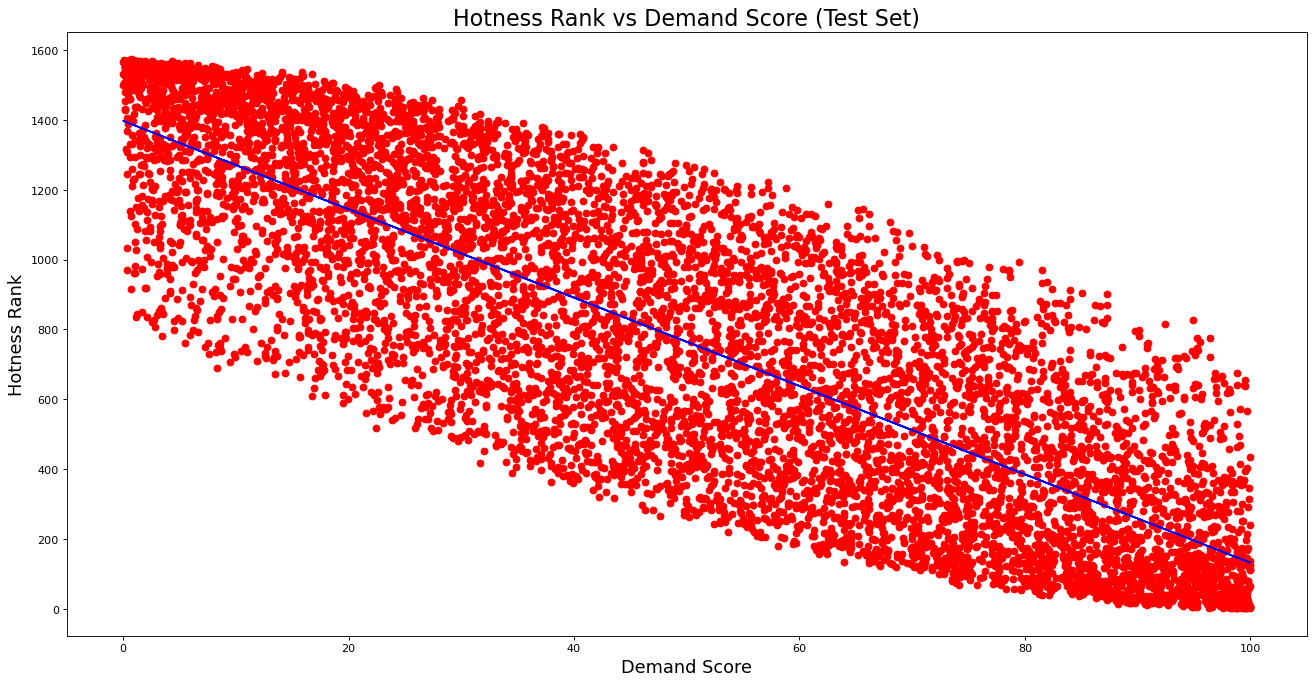

In [57]:
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=80)

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color= 'blue')

plt.title('Hotness Rank vs Demand Score (Test Set)', fontsize=20)
plt.xlabel('Demand Score', fontsize=16)
plt.ylabel('Hotness Rank', fontsize=16)
plt.show()

In [64]:
conn = psycopg2.connect('dbname=data user=postgres host=localhost password=xxx port=5432')

In [65]:
conn

<connection object at 0x0000020830B677B8; dsn: 'user=postgres password=xxx dbname=data host=localhost port=5432', closed: 0>

In [66]:
cur = conn.cursor()

In [67]:
cur

<cursor object at 0x00000208319FD048; closed: 0>

In [68]:
type(cur)

psycopg2.extensions.cursor

In [90]:
cur.execute('''SELECT * FROM realtor_data_full''')

In [91]:
data2 = cur.fetchall()
data2

[('albany',
  'ga',
  1354,
  -90,
  Decimal('29.04248573'),
  Decimal('11.28725428'),
  Decimal('81'),
  Decimal('0.018867925'),
  Decimal('0.4'),
  Decimal('214000'),
  Decimal('0.075647148'),
  Decimal('0.262909413'),
  '8/1/2018'),
 ('decatur',
  'in',
  183,
  -2,
  Decimal('63.15789474'),
  Decimal('99.11223843'),
  Decimal('60'),
  Decimal('0.034482759'),
  Decimal('0.894736842'),
  Decimal('108200'),
  Decimal('0.006979991'),
  Decimal('0.051506317'),
  '8/1/2018'),
 ('morgan city',
  'la',
  1543,
  -156,
  Decimal('6.911857958'),
  Decimal('3.170577045'),
  Decimal('109'),
  Decimal('0.260115607'),
  Decimal('0.25'),
  Decimal('150000'),
  Decimal('0'),
  Decimal('0'),
  '8/1/2018'),
 ('mount vernon',
  'il',
  1233,
  -152,
  Decimal('42.4857324'),
  Decimal('11.54090044'),
  Decimal('72'),
  Decimal('-0.058823529'),
  Decimal('0'),
  Decimal('119000'),
  Decimal('-0.013266998'),
  Decimal('-0.007506255'),
  '8/1/2018'),
 ('richmond',
  'va',
  464,
  139,
  Decimal('43.3734

In [92]:
data_basic2 = pd.DataFrame(data2, columns =['city', 'state', 'hotness_rank', 'hotness_rank_yy', 'supply_score',
                                          'demand_score', 'median_days_on_market', 'median_days_on_market_yy',
                                          'unique_viewers_per_property_yy', 'median_listing_price','median_listing_price_mm',
                                           'median_listing_price_yy','date'])

In [93]:
data_basic2.head()

,city,state,hotness_rank,hotness_rank_yy,supply_score,demand_score,median_days_on_market,median_days_on_market_yy,unique_viewers_per_property_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,date
0,albany,ga,1354,-90,29.04248573,11.28725428,81,0.018867925,0.4,214000,0.075647148,0.262909413,8/1/2018
1,decatur,in,183,-2,63.15789474,99.11223843,60,0.034482759,0.894736842,108200,0.006979991,0.051506317,8/1/2018
2,morgan city,la,1543,-156,6.911857958,3.170577045,109,0.260115607,0.25,150000,0,0,8/1/2018
3,mount vernon,il,1233,-152,42.4857324,11.54090044,72,-0.058823529,0,119000,-0.013266998,-0.007506255,8/1/2018
4,richmond,va,464,139,43.37349398,89.66391883,71.5,-0.143712575,0.4375,264900,-0.033035225,0.331155779,8/1/2018


In [94]:
data_basic2.shape

(47928, 13)

In [95]:
data_basic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47928 entries, 0 to 47927
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   city                            47928 non-null  object
 1   state                           47928 non-null  object
 2   hotness_rank                    47928 non-null  int64 
 3   hotness_rank_yy                 47928 non-null  int64 
 4   supply_score                    47928 non-null  object
 5   demand_score                    47928 non-null  object
 6   median_days_on_market           47928 non-null  object
 7   median_days_on_market_yy        47928 non-null  object
 8   unique_viewers_per_property_yy  47928 non-null  object
 9   median_listing_price            47928 non-null  object
 10  median_listing_price_mm         47928 non-null  object
 11  median_listing_price_yy         47928 non-null  object
 12  date                            47928 non-null

In [117]:
data_basic2['supply_score'] = data_basic2['supply_score'].astype('int64', errors = 'raise')
data_basic2['demand_score'] = data_basic2['demand_score'].astype('int64', errors = 'raise')
data_basic2['median_days_on_market'] = data_basic2['median_days_on_market'].astype('int64', errors = 'raise')
data_basic2['median_days_on_market_yy'] = data_basic2['median_days_on_market_yy'].astype('int64', errors = 'raise')
data_basic2['unique_viewers_per_property_yy'] = data_basic2['unique_viewers_per_property_yy'].astype('int64', errors = 'raise')
data_basic2['median_listing_price'] = data_basic2['median_listing_price'].astype('int64', errors = 'raise')
data_basic2['median_listing_price_mm'] = data_basic2['median_listing_price_mm'].astype('int64', errors = 'raise')
data_basic2['median_listing_price_yy'] = data_basic2['median_listing_price_yy'].astype('int64', errors = 'raise')

In [118]:
data_basic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47928 entries, 0 to 47927
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   city                            47928 non-null  object
 1   state                           47928 non-null  object
 2   hotness_rank                    47928 non-null  int64 
 3   hotness_rank_yy                 47928 non-null  int64 
 4   supply_score                    47928 non-null  int64 
 5   demand_score                    47928 non-null  int64 
 6   median_days_on_market           47928 non-null  int64 
 7   median_days_on_market_yy        47928 non-null  int64 
 8   unique_viewers_per_property_yy  47928 non-null  int64 
 9   median_listing_price            47928 non-null  int64 
 10  median_listing_price_mm         47928 non-null  int64 
 11  median_listing_price_yy         47928 non-null  int64 
 12  date                            47928 non-null

Text(0.5, 1.0, 'Correlation Matrix')

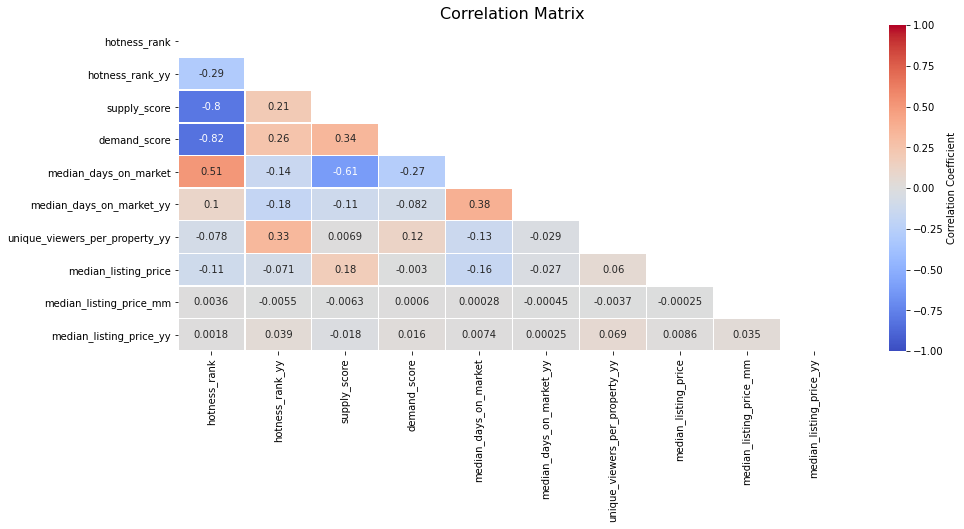

In [119]:
plt.figure(figsize=(15,6))

matrix = np.triu(data_basic2.corr())
sns.heatmap(data_basic2.corr(), annot=True, mask=matrix, cmap= 'coolwarm', vmin=-1, vmax=1, linewidths=.5, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix', fontsize=16)

In [136]:
X = data_basic2.iloc[:, [4]].values # independent variable matrix (demand_score)
y = data_basic2.iloc[:,[9]].values # dependent variable vector (median_listing_price)

In [137]:
print(X)

[[29]
 [63]
 [ 6]
 ...
 [91]
 [58]
 [13]]


In [138]:
print(y)

[[214000]
 [108200]
 [150000]
 ...
 [199900]
 [240000]
 [224900]]


In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [140]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [141]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.034861727607222615
Testing Score: 0.030829336036988453


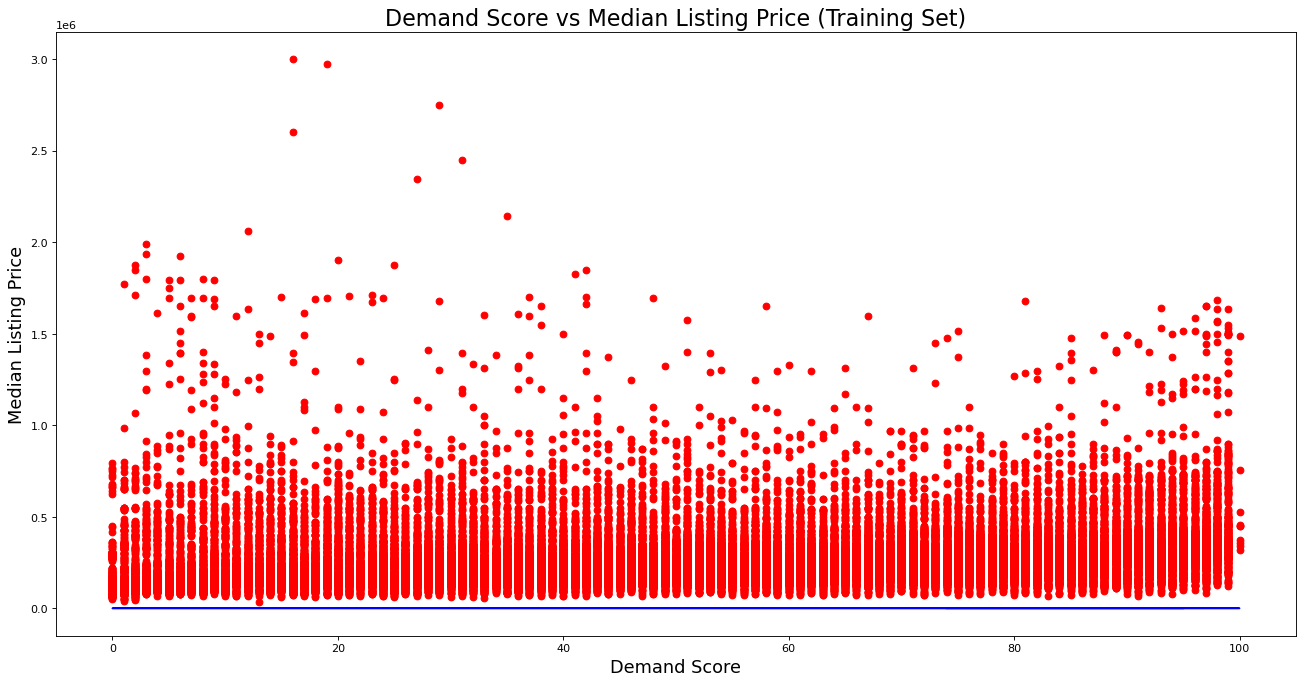

In [142]:
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=80)

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color= 'blue')

plt.title('Demand Score vs Median Listing Price (Training Set)', fontsize=20)
plt.xlabel('Demand Score', fontsize=16)
plt.ylabel('Median Listing Price', fontsize=16)
plt.show()

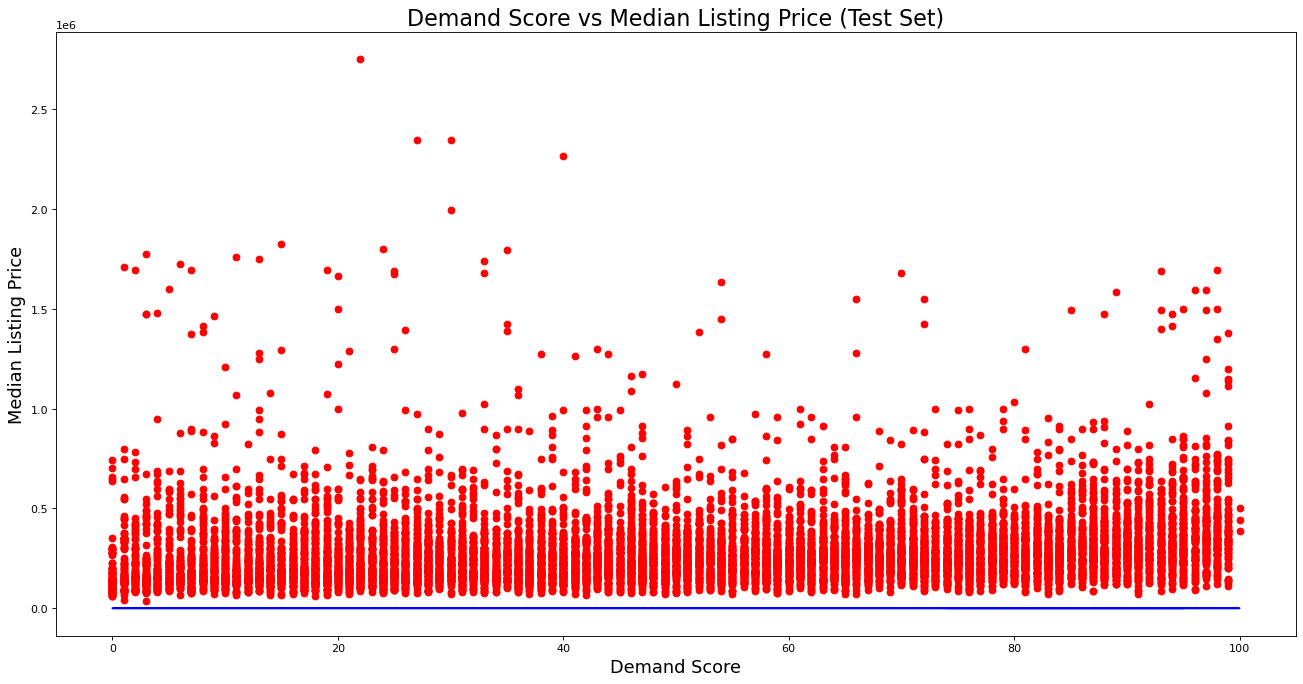

In [144]:
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=80)

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color= 'blue')

plt.title('Demand Score vs Median Listing Price (Test Set)', fontsize=20)
plt.xlabel('Demand Score', fontsize=16)
plt.ylabel('Median Listing Price', fontsize=16)
plt.show()